# Titanic Survival Prediction

## Task

This notebook is related to the following Kaggle competition: "Titanic - Machine Learning from Disaster," which can be found at https://www.kaggle.com/c/titanic/overview. The challenge involves building a model to predict Titanic survival given information such as age, ticket class, and sex. The competition data includes a training set with outcomes, a test set, and an additional file that shows example output. 

## Approach

I started with a basic examinination of the training set to look at variables and determine if there were any null values. I followed up by exploring the data frame variables using pairplots and value counts. This allowed me to determine which columns will be useful for the analysis and which columns are made mostly or entirely of unique features. For example, every passenger had a different name, so this will likely be unhelpful for the prediction. 

To prepare the training and test sets, dropped columns with mostly or entirely unique values. I also changed strings to integers. For example, Embarked includes "S," "C," and "Q" values, which I replaced with integers 1-3. I filled NaN values with 0 if the only other value in the column was 1. For cabins, either a cabin name was specified or a passenger did not stay in a cabin. Therefore, I replaced any specified cabin with 1 and NaN values with 0 to delineate which passengers stayed in cabins and which ones did not. Otherwise, I filled NaN values with the column mean. To specify which values were previously NaN, I used feature engineering. I created another column that contained 1s if a value was specified in the original data frame and 0s if no value was specified. I split the training set into X and y. The test set only contains X data. 

I loaded the following models using sklearn and tuned hyperparameters using GridSearchCV: GaussianNB, LogisticRegression, svm.SVC, DecisionTreeClassifier, and RandomForestClassifier. After incoporating the new hyperparameters, I ensembled the models using VotingClassifier and fit X and y from the training set. Finally, I used the ensembled models to make predictions for X_test. I wrote the passenger IDs and predictions to a csv file and uploaded them to Kaggle. My accuracy score was 0.76794. 

## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization 
import matplotlib.pyplot as plt # visualization

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Examine Training Set

In [3]:
# load training set
train = pd.read_csv('train.csv')

In [4]:
train.shape

(891, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Null values in Age, Cabin, and Embarked
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

## Examine Gender File

The final output file should be in the same format as the gender file.

In [9]:
gen = pd.read_csv('gender_submission.csv')
gen.shape

(418, 2)

In [10]:
gen.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Exploration of Variables

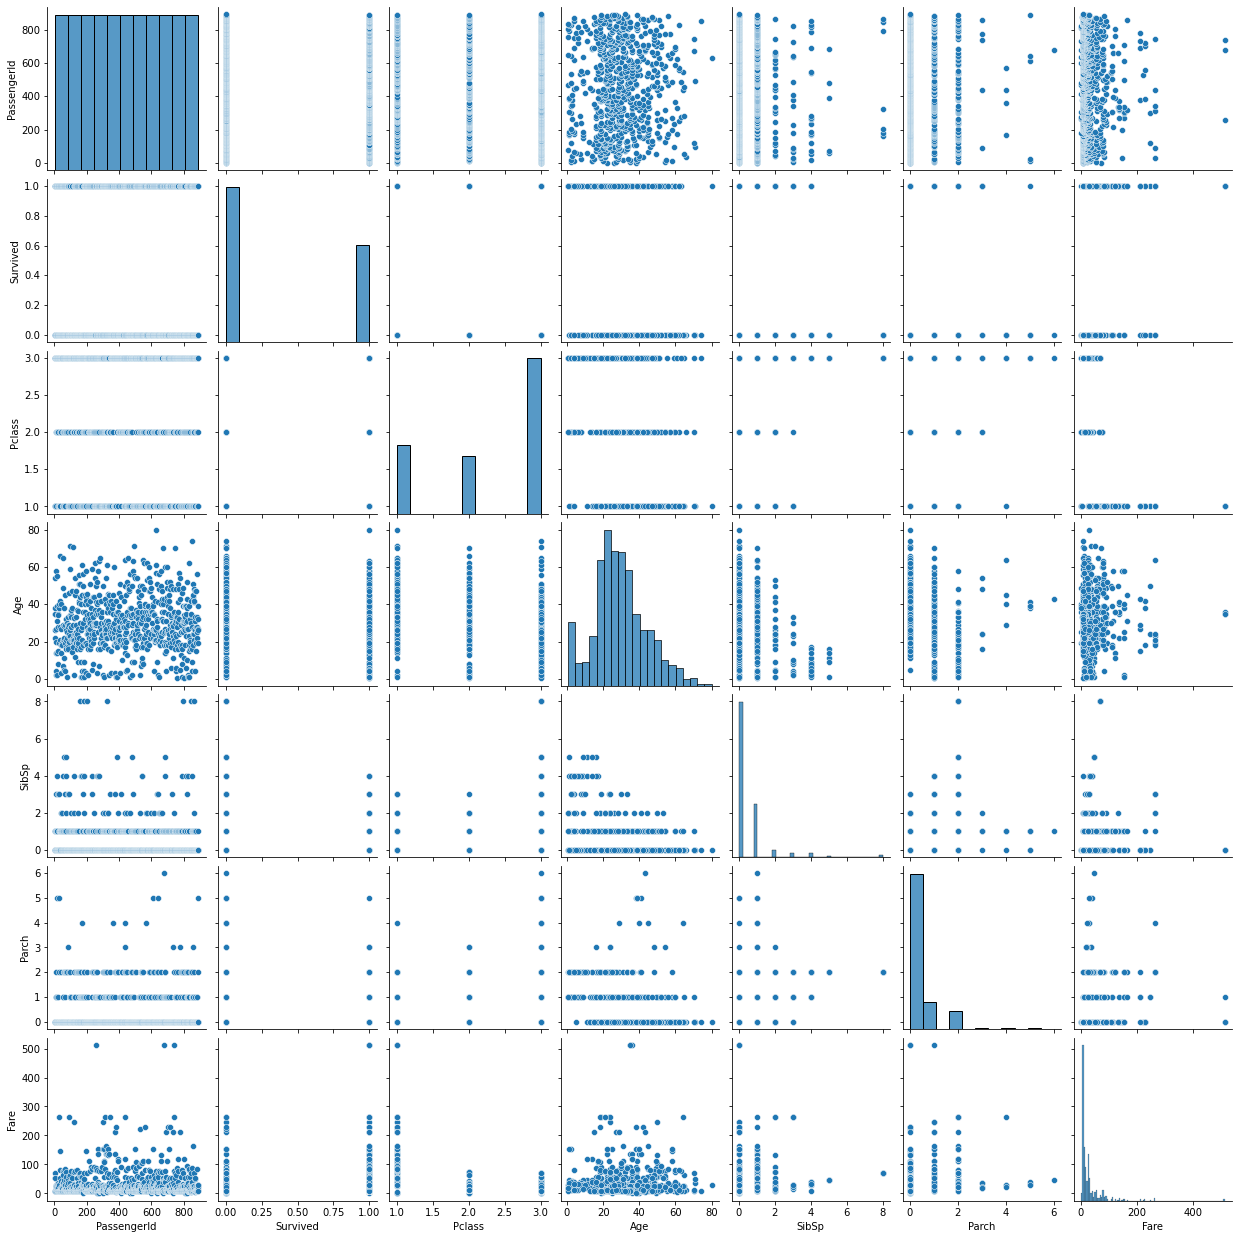

In [11]:
sns.pairplot(train)

In [12]:
# Unique to each person
train['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

In [13]:
# Multiple people per class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
# Multiple people per class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
# Unique to each person
train['Name'].value_counts()

Nye, Mrs. (Elizabeth Ramell)                         1
Lurette, Miss. Elise                                 1
Kallio, Mr. Nikolai Erland                           1
Dahl, Mr. Karl Edwart                                1
Patchett, Mr. George                                 1
                                                    ..
Harris, Mr. Henry Birkhardt                          1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
Jonkoff, Mr. Lalio                                   1
Skoog, Mr. Wilhelm                                   1
Chambers, Mrs. Norman Campbell (Bertha Griggs)       1
Name: Name, Length: 891, dtype: int64

In [16]:
# Multiple people per class
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Multiple people per class
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [18]:
# Multiple people per class
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
# Multiple people per class
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
# Multiple people per class but mostly unique
# Could possibly be dropped in next section
train['Ticket'].value_counts()

CA. 2343       7
347082         7
1601           7
3101295        6
347088         6
              ..
28228          1
368323         1
349204         1
S.W./PP 752    1
PC 17612       1
Name: Ticket, Length: 681, dtype: int64

In [21]:
# Multiple people per class
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [22]:
# Multiple people per class
# Mostly Unique or NaN
# Change values to 1s and 0s in next section
train['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F2             3
              ..
F E69          1
D49            1
B71            1
A6             1
E49            1
Name: Cabin, Length: 147, dtype: int64

In [23]:
# Multiple people per class
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Data Preparation: Training Set

In [24]:
training = train.copy()
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Fill non-NaN cabins with 1
# Fill NaN cabins with 0
training['Cabin'] = training['Cabin'].where(~training['Cabin'].notna(), 1)
training['Cabin'] = training['Cabin'].fillna(0)

# Drop columns with only/mostly unique values
# PassengerId, Name, Ticket
training.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Change embarked to int values
training['Embarked'] = training['Embarked'].replace('C', 1)
training['Embarked'] = training['Embarked'].replace('Q', 2)
training['Embarked'] = training['Embarked'].replace('S', 3)

# Indicate which values are NaN in Embarked and Age
# Indicate which valaues are NaN in Fare
# There aren't any NaN fares in train, but there are some in test
training['Embarked_included'] = np.where(training.Embarked.notnull(), 1, 0)
training['Age_included'] = np.where(training.Age.notnull(), 1, 0)
training['Fare_included'] = np.where(training.Fare.notnull(), 1, 0)

# Fill NaN values in Embarked and Age
training['Embarked'].fillna(value=training['Embarked'].mean(), inplace=True)
training['Age'].fillna(value=training['Age'].mean(), inplace=True)

# Change sex to int values
training['Female'] = np.where(training['Sex']=='female', 1, 0)
training['Male'] = np.where(training['Sex']=='male', 1, 0)

# Drop sex column
training.drop(['Sex'], axis=1, inplace=True)

training.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_included,Age_included,Fare_included,Female,Male
0,0,3,22.0,1,0,7.2500,0,3.0,1,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,1.0,1,1,1,1,0
2,1,3,26.0,0,0,7.9250,0,3.0,1,1,1,1,0
3,1,1,35.0,1,0,53.1000,1,3.0,1,1,1,1,0
4,0,3,35.0,0,0,8.0500,0,3.0,1,1,1,0,1


In [26]:
# Split into X and y
y = pd.DataFrame(training['Survived'])
X = pd.DataFrame(training.drop('Survived', axis=1))

In [27]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [28]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_included,Age_included,Fare_included,Female,Male
0,3,22.0,1,0,7.2500,0,3.0,1,1,1,0,1
1,1,38.0,1,0,71.2833,1,1.0,1,1,1,1,0
2,3,26.0,0,0,7.9250,0,3.0,1,1,1,1,0
3,1,35.0,1,0,53.1000,1,3.0,1,1,1,1,0
4,3,35.0,0,0,8.0500,0,3.0,1,1,1,0,1


## Data Preparation: Test Set

In [29]:
test = pd.read_csv('test.csv')

In [30]:
test.shape

(418, 11)

In [31]:
testing = test.copy()
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
testing.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [33]:
# Fill non-NaN cabins with 1
# Fill NaN cabins with 0
testing['Cabin'] = testing['Cabin'].where(~testing['Cabin'].notna(), 1)
testing['Cabin'] = testing['Cabin'].fillna(0)

# Drop columns with only unique values
# PassengerId and Name
testing.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Change embarked to int values
testing['Embarked'] = testing['Embarked'].replace('C', 1)
testing['Embarked'] = testing['Embarked'].replace('Q', 2)
testing['Embarked'] = testing['Embarked'].replace('S', 3)

# Indicate which values are NaN in Embarked, Age, and Fare
testing['Embarked_included'] = np.where(testing.Embarked.notnull(), 1, 0)
testing['Age_included'] = np.where(testing.Age.notnull(), 1, 0)
testing['Fare_included'] = np.where(testing.Fare.notnull(), 1, 0)

# Fill NaN values in Embarked, Age, and Fare
testing['Embarked'].fillna(value=testing['Embarked'].mean(), inplace=True)
testing['Age'].fillna(value=testing['Age'].mean(), inplace=True)
testing['Fare'].fillna(value=testing['Fare'].mean(), inplace=True)

# Change sex to int values
testing['Female'] = np.where(testing['Sex']=='female', 1, 0)
testing['Male'] = np.where(testing['Sex']=='male', 1, 0)

# Drop sex column
testing.drop(['Sex'], axis=1, inplace=True)

testing.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_included,Age_included,Fare_included,Female,Male
0,3,34.5,0,0,7.8292,0,2,1,1,1,0,1
1,3,47.0,1,0,7.0000,0,3,1,1,1,1,0
2,2,62.0,0,0,9.6875,0,2,1,1,1,0,1
3,3,27.0,0,0,8.6625,0,3,1,1,1,0,1
4,3,22.0,1,1,12.2875,0,3,1,1,1,1,0


In [34]:
# Create X variable
X_test = testing

In [35]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_included,Age_included,Fare_included,Female,Male
0,3,34.5,0,0,7.8292,0,2,1,1,1,0,1
1,3,47.0,1,0,7.0000,0,3,1,1,1,1,0
2,2,62.0,0,0,9.6875,0,2,1,1,1,0,1
3,3,27.0,0,0,8.6625,0,3,1,1,1,0,1
4,3,22.0,1,1,12.2875,0,3,1,1,1,1,0


In [36]:
X_test.isnull().any()

Pclass               False
Age                  False
SibSp                False
Parch                False
Fare                 False
Cabin                False
Embarked             False
Embarked_included    False
Age_included         False
Fare_included        False
Female               False
Male                 False
dtype: bool

## Data Models

In [37]:
state = 26

In [38]:
# Load 5 models

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = GaussianNB()
model2 = LogisticRegression(solver='liblinear',multi_class="auto", random_state=state)
model3 = svm.SVC(gamma="scale",kernel="rbf", random_state=state, probability=True)
model4 = DecisionTreeClassifier(
    random_state=state, 
    criterion='entropy',
    splitter='best', 
    max_depth=5, 
    min_samples_split=2)
model5 = RandomForestClassifier(
    n_estimators=100,
    random_state=state, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

## Tuning the Models

In [39]:
# Model 2
param_grid2 = {
                 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
                 'multi_class': ('auto', 'ovr', 'multinomial'),
             }

In [40]:
from sklearn.model_selection import GridSearchCV

grid_model2 = GridSearchCV(model2, param_grid2, cv=10, n_jobs=-1)
grid_model2.fit(X,y)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=26, solver='liblinear'),
             n_jobs=-1,
             param_grid={'multi_class': ('auto', 'ovr', 'multinomial'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [41]:
grid_model2.best_params_

{'multi_class': 'auto', 'solver': 'lbfgs'}

In [42]:
# Model 4
param_grid4 = {
                 'criterion': ('gini', 'entropy'),
                 'splitter': ('best', 'random'),
                 'max_depth': [2, 5, 7, 9],
                 'min_samples_split': [2, 4, 8, 10],
             }

In [43]:
grid_model4 = GridSearchCV(model4, param_grid4, cv=10, n_jobs=-1)
grid_model4.fit(X,y)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              random_state=26),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 5, 7, 9],
                         'min_samples_split': [2, 4, 8, 10],
                         'splitter': ('best', 'random')})

In [44]:
grid_model4.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_split': 8,
 'splitter': 'random'}

In [45]:
# Model 5
param_grid5 = {
                 'criterion': ('gini', 'entropy'),
                 'n_estimators': [10, 50, 100, 300],
                 'max_depth': [2, 5, 7, 9],
                 'min_samples_split': [2, 4, 8, 10],
             }

In [46]:
grid_model5 = GridSearchCV(model5, param_grid5, cv=10, n_jobs=-1)
grid_model5.fit(X,y)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=26),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 5, 7, 9],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [10, 50, 100, 300]})

In [47]:
grid_model5.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 4,
 'n_estimators': 300}

## Incorporate new hyperparameters

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1 = GaussianNB()
model2 = LogisticRegression(solver='liblinear',multi_class="auto", random_state=state)
model3 = svm.SVC(gamma="scale",kernel="rbf", probability=True)
model4 = DecisionTreeClassifier(
    random_state=state, 
    criterion='gini',
    splitter='random', 
    max_depth=9, 
    min_samples_split=8)
model5 = RandomForestClassifier(
    n_estimators=300,
    random_state=state, 
    criterion='gini',
    max_depth=9, 
    min_samples_split=2)

## Ensemble and Predict

In [49]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('nb', model1), ('lr', model2), ('svm', model3), ('dt', model4), ('rf', model5)], voting='soft')

ensemble = ensemble.fit(X,y)
surv_predict = ensemble.predict(X_test)

In [50]:
surv_predict.shape

(418,)

In [51]:
# write csv file with results
import csv

filename = 'survival.csv'
row1 = ['PassengerId', 'Survived'] # specified by competition
passenger_ids = test['PassengerId'].tolist()

with open(filename, 'w', newline = '') as csvfile:
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(row1)

    for s in range(len(surv_predict)):
        ids = passenger_ids[s]
        surv = surv_predict[s]

        row_contents = [ids, surv]
        csvwriter.writerow(row_contents)

## Kaggle Accuracy score: 0.76794